In [1]:
from Bio.PDB import *
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

# average of 5 proteins

In [48]:
def create_contact_map(name):
    data = np.zeros((181,181))
    for i in range(5):
        parser = PDBParser()
        pre = "/Users/weilu/Dropbox/GlpG_paper_2018/figures/"
        target = pre + f"picked_structure_pdbs/{name}/structure_{i}.pdb"
        structure = parser.get_structure('target', target)
        # Assume only one chain
        model = structure[0]
        # chain = model['A']
        chain = model.child_list[0]
        # with open("contact.csv", "w") as out:
        #     out.write("i, j, Distance\n")
        for i_residue in chain:
    #         print(i)
            is_regular_res = i_residue.has_id('CA')
            # print(i_residue, is_regular_res)
            if i_residue.get_resname() == "GLY":
                res_i = i_residue['CA']
            else:
                res_i = i_residue['CB']
            for j_residue in chain:
                if j_residue.get_resname() == "GLY":
                    res_j = j_residue['CA']
                else:
                    res_j = j_residue['CB']
                distance = (res_i.get_coord()[0] - res_j.get_coord()[0])**2
                distance += (res_i.get_coord()[1] - res_j.get_coord()[1])**2
                distance += (res_i.get_coord()[2] - res_j.get_coord()[2])**2
                distance = distance**0.5
        #         print(res_i.get_coord()[0], res_j.get_coord()[0], res_i.get_coord()[0] - res_j.get_coord()[0])
                i = i_residue.id[1]
                j = j_residue.id[1]
                data[i-1,j-1] += int(distance < 7)
                out_line = str(i) + ", " + str(j) + ", " + str(distance) + "\n"
        #         out.write(out_line)
        #         print(out_line)
    data /= 5.0
    return data

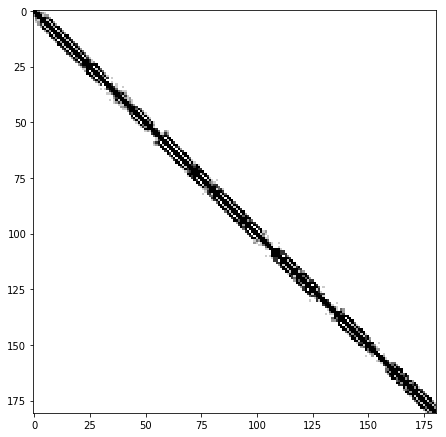

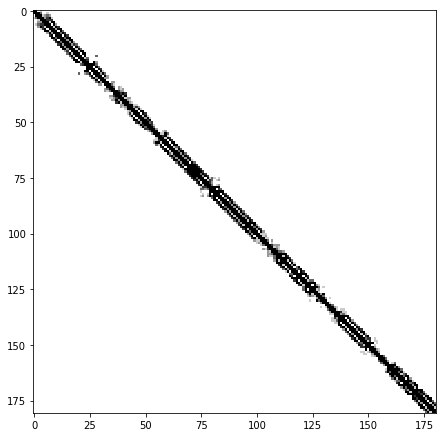

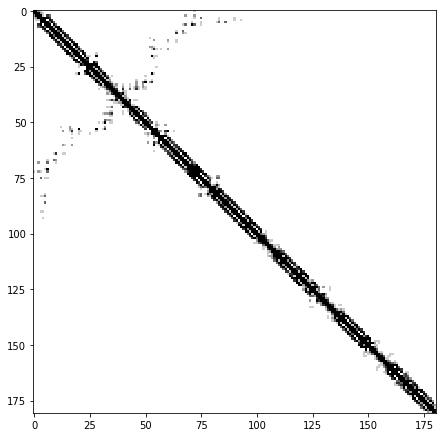

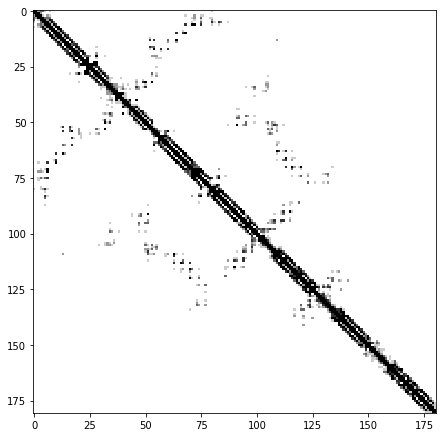

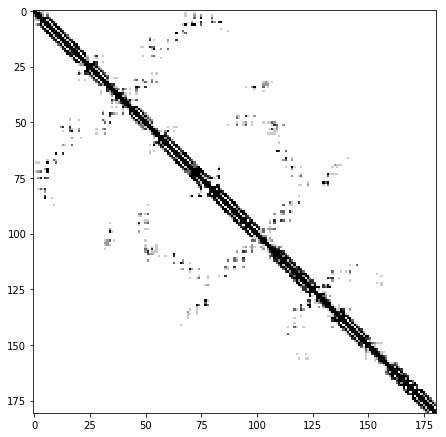

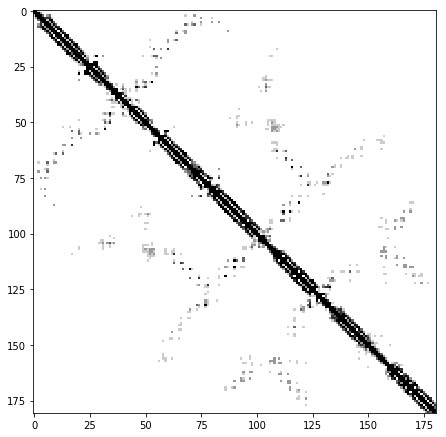

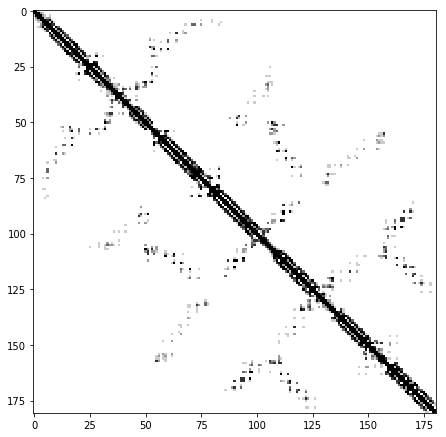

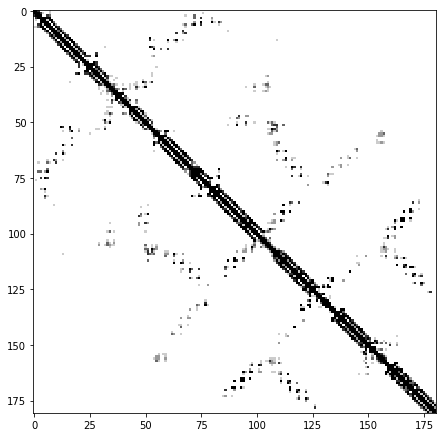

In [57]:

target_dic = {"complete_out":"low_e_jun01_out",
            "low_e_h12":"low_e_jun01_h12",
             "low_e_h34":"low_e_jun01_h34",
             "low_e_h56":"low_e_jun01_h56",
             "low_e_pre_transition":"low_e_jun01_pre",
             "low_e_transition":"low_e_jun01_transition",
             "low_e_post_transition":"low_e_jun01_post_transition",
             "other_path/low_e_path1":"other_path/low_e_path1",
             "other_path/low_e_path2":"other_path/low_e_path2",
             "native":"native"}
name_dic = {"complete_out":"complete_out",
            "low_e_h12":"h12",
             "low_e_h34":"h34",
             "low_e_h56":"h56",
             "low_e_pre_transition":"pre_transition",
             "low_e_transition":"transition",
             "low_e_post_transition":"post_transition",
             "other_path/low_e_path1":"path1",
             "other_path/low_e_path2":"path2",
            "native":"native"}
# name_list = ["complete_out", "low_e_h12", "low_e_h34", "low_e_h56", 
#              "low_e_post_transition", "low_e_transition","low_e_pre_transition",
#             "other_path/low_e_path1", "other_path/low_e_path2"]
name_list = ["complete_out", "low_e_h12", "low_e_h34", "low_e_h56", 
             "low_e_post_transition", "low_e_transition","low_e_pre_transition", "native"]
for name in name_list:
    data = create_contact_map(name)
    plt.imshow(data, cmap="gist_gray_r")
    plt.tight_layout()
    plt.savefig(f"/Users/weilu/Dropbox/GlpG_paper_2018/figures/contact_maps/{name_dic[name]}.png")
    plt.figure()

In [49]:
gamma = create_contact_map("low_e_post_transition")

In [50]:
beta = create_contact_map("low_e_transition")

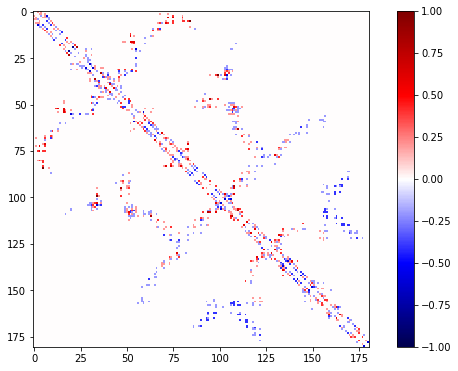

In [51]:
plt.imshow(gamma-beta, cmap="seismic" , clim=(-1,1))
plt.colorbar()

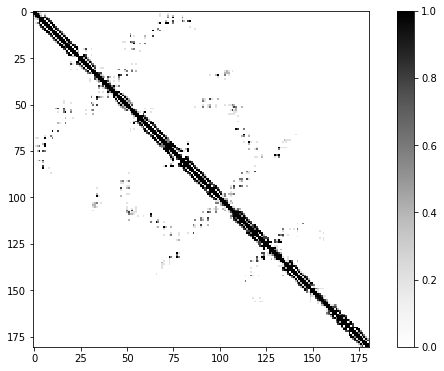

In [58]:
plt.imshow(gamma, cmap="Greys", clim=(0,1))
plt.colorbar()

In [43]:
gamma

array([[ 0. ,  0. ,  0.6, ...,  1. ,  1. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  1. ,  1. ,  1. ],
       [ 0.6,  0. ,  0. , ...,  1. ,  1. ,  1. ],
       ..., 
       [ 1. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 1. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 1. ,  1. ,  1. , ...,  1. ,  0. ,  0. ]])

In [42]:
beta

array([[ 0. ,  0. ,  0.8, ...,  1. ,  1. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  1. ,  1. ,  1. ],
       [ 0.8,  0. ,  0. , ...,  1. ,  1. ,  1. ],
       ..., 
       [ 1. ,  1. ,  1. , ...,  0. ,  0. ,  0.4],
       [ 1. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 1. ,  1. ,  1. , ...,  0.4,  0. ,  0. ]])

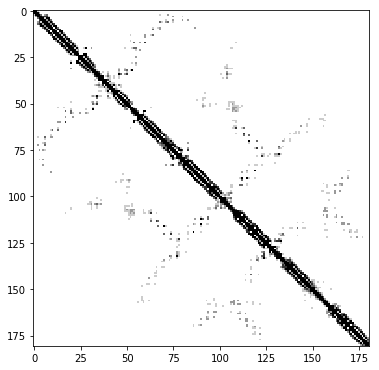

In [40]:
plt.imshow(beta, cmap="gist_gray")

In [ ]:
data = np.zeros((181,181))
for i in range(5):
    parser = PDBParser()
    pre = "/Users/weilu/Dropbox/GlpG_paper_2018/figures/"
    target = pre + f"picked_structure_pdbs/low_e_h56/structure_{i}.pdb"
    structure = parser.get_structure('target', target)
    # Assume only one chain
    model = structure[0]
    # chain = model['A']
    chain = model.child_list[0]
    # with open("contact.csv", "w") as out:
    #     out.write("i, j, Distance\n")
    for i_residue in chain:
#         print(i)
        is_regular_res = i_residue.has_id('CA')
        # print(i_residue, is_regular_res)
        if i_residue.get_resname() == "GLY":
            res_i = i_residue['CA']
        else:
            res_i = i_residue['CB']
        for j_residue in chain:
            if j_residue.get_resname() == "GLY":
                res_j = j_residue['CA']
            else:
                res_j = j_residue['CB']
            distance = (res_i.get_coord()[0] - res_j.get_coord()[0])**2
            distance += (res_i.get_coord()[1] - res_j.get_coord()[1])**2
            distance += (res_i.get_coord()[2] - res_j.get_coord()[2])**2
            distance = distance**0.5
    #         print(res_i.get_coord()[0], res_j.get_coord()[0], res_i.get_coord()[0] - res_j.get_coord()[0])
            i = i_residue.id[1]
            j = j_residue.id[1]
            data[i-1,j-1] += int(distance > 7)
            out_line = str(i) + ", " + str(j) + ", " + str(distance) + "\n"
    #         out.write(out_line)
    #         print(out_line)
data /= 5.0

In [49]:
# one protein
data = np.zeros((181,181))
parser = PDBParser()
target = "/Users/weilu/Research/data/03_week/low_e_jun01_h56/structure_0.pdb"
structure = parser.get_structure('target', target)
# Assume only one chain
model = structure[0]
# chain = model['A']
chain = model.child_list[0]
# with open("contact.csv", "w") as out:
#     out.write("i, j, Distance\n")
for i_residue in chain:
    is_regular_res = i_residue.has_id('CA')
    # print(i_residue, is_regular_res)
    if i_residue.get_resname() == "GLY":
        res_i = i_residue['CA']
    else:
        res_i = i_residue['CB']
    for j_residue in chain:
        if j_residue.get_resname() == "GLY":
            res_j = j_residue['CA']
        else:
            res_j = j_residue['CB']
        distance = (res_i.get_coord()[0] - res_j.get_coord()[0])**2
        distance += (res_i.get_coord()[1] - res_j.get_coord()[1])**2
        distance += (res_i.get_coord()[2] - res_j.get_coord()[2])**2
        distance = distance**0.5
#         print(res_i.get_coord()[0], res_j.get_coord()[0], res_i.get_coord()[0] - res_j.get_coord()[0])
        i = i_residue.id[1]
        j = j_residue.id[1]
        data[i-1,j-1] = distance
        out_line = str(i) + ", " + str(j) + ", " + str(distance) + "\n"
#         out.write(out_line)
#         print(out_line)

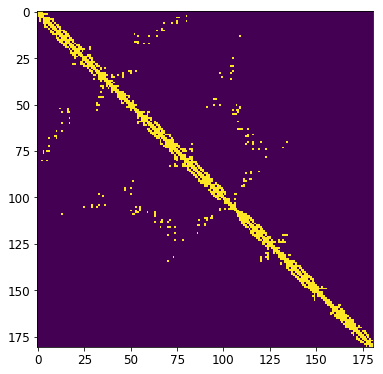

In [50]:
plt.imshow(data < 7)